# Complete clustering Example using data on credit card details of customers

__The Machine learning workflow__:
Remember, as data scientists we want a consistent process to getting great results. That’s where the machine learning workflow comes in.
There are five core steps:
-__Exploratory Analysis__ – First, “get to know” the data. This step should be quick, efficient, and decisive.
-__Data Cleaning__ – Then, clean your data to avoid many common pitfalls. Better data beats fancier algorithms.
-__Feature Engineering__ – Next, help your algorithms “focus” on what’s important by creating new features.
-__Algorithm Selection__ – Choose the best, most appropriate algorithms without wasting your time.
-__Model Training__ – Finally, train your models. This step is pretty formulaic once you’ve done the first four.

## Exploratory Analysis

Why: - Get to know the dataset
Time: - Should be quick, efficient and decisive
Questions to answer: - How many observations do I have? - How many features? - What are the data types of my features? Are they numeric? Categorical? - Do I have a target variable? - Correlations?

In [241]:
#Loading data
import pandas as pd
df = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\credit_card_clust_uni.txt")
print(df.head())
print("Number of observations: ", df.shape[0])
print("Number of features: ", df.shape[1])

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape: (8950, 18)
-----------------
CUST_ID --> Type:cat | Nas: 0(0%) | Categories: 8950 | Possible Primary Key/Unique Identifier
BALANCE --> Type:num | Nas: 0(0%) | Min-Max: (0)-(19043)
BALANCE_FREQUENCY --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
PURCHASES --> Type:num | Nas: 0(0%) | Min-Max: (0)-(49039)
ONEOFF_PURCHASES --> Type:num | Nas: 0(0%) | Min-Max: (0)-(40761)
INSTALLMENTS_PURCHASES --> Type:num | Nas: 0(0%) | Min-Max: (0)-(22500)
CASH_ADVANCE --> Type:num | Nas: 0(0%) | Min-Max: (0)-(47137)
PURCHASES_FREQUENCY --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
ONEOFF_PURCHASES_FREQUENCY --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
PURCHASES_INSTALLMENTS_FREQUENCY --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
CASH_ADVANCE_FREQUENCY --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
CASH_ADVANCE_TRX --> Type:num | Nas: 0(0%) | Min-Max: (0)-(123)
PURCHASES_TRX --> Type:num | Nas: 0(0%) | Min-Max: (0)-(

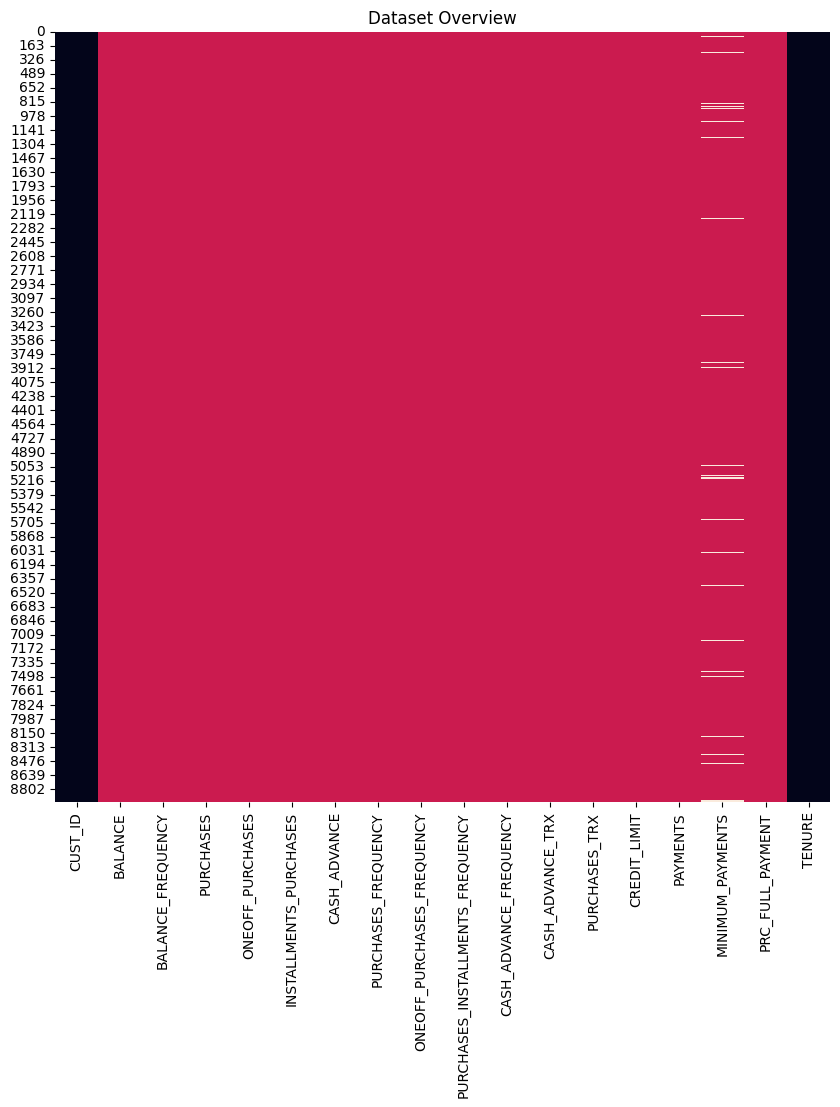

 Categerocial   Numerical/DateTime   NaN 


In [242]:
#Using function to find nans and num and catergorical variables in df
%load_ext autoreload
from functions import dtf_overview
%autoreload 2
dtf_overview(df, figsize=(10,10))

In [243]:
#Set CUST ID as index
df = df.set_index("CUST_ID")
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


Features explanation (assumptions):
    - BALANCE: What customer is owing
    - BALANCE_FREQUENCY: How often the customer owes
    - PURCHASES: Transactions used with card
    - ONEOFF_PURCHASES: One purchase and then no more
    - INSTALLMENT_PURCHASES: A purchase split into smaller payments over time
    - CASH_ADVANCE: How much the customer is borrowing
    - PURCHASES_FREQUENCY: How often the customer purchases things
    - ONEOFF_PURCHASES_FREQUENCY: How often customer uses ONEOFF
    - PURCHASES_INSTALLMENTS_FREQUENCY: How often customer pays purchases over time rather than everything at once
    - CASH_ADVANCE_FREQUENCY: How often customer is borrowing
    - CASH_ADVANCE_TRX: How many advances the customer have had
    - PURCHASES_TRX: How many purchases the customer have had
    - CREDIT_LIMIT: The limit of how much the customer can borrow (can be exceeded)
    - PAYMENTS: Money paid back by the customer
    - MINIMUM_PAYMENTS: The lowest amount that the customer can pay back every month
    - PRC_FULL_PAYMENT: Percentage of debt paid by customer
    - TENURE: Period from when the loan is paid out to the customer to the last monthly payment.


array([[<AxesSubplot: title={'center': 'BALANCE'}>,
        <AxesSubplot: title={'center': 'BALANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES'}>],
       [<AxesSubplot: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE'}>,
        <AxesSubplot: title={'center': 'PURCHASES_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_TRX'}>,
        <AxesSubplot: title={'center': 'PURCHASES_TRX'}>],
       [<AxesSubplot: title={'center': 'CREDIT_LIMIT'}>,
        <AxesSubplot: title={'center': 'PAYMENTS'}>,
        <AxesSubplot: title={'center': 'MINIMUM_PAYMENTS'}>,
        <AxesSubplot: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes

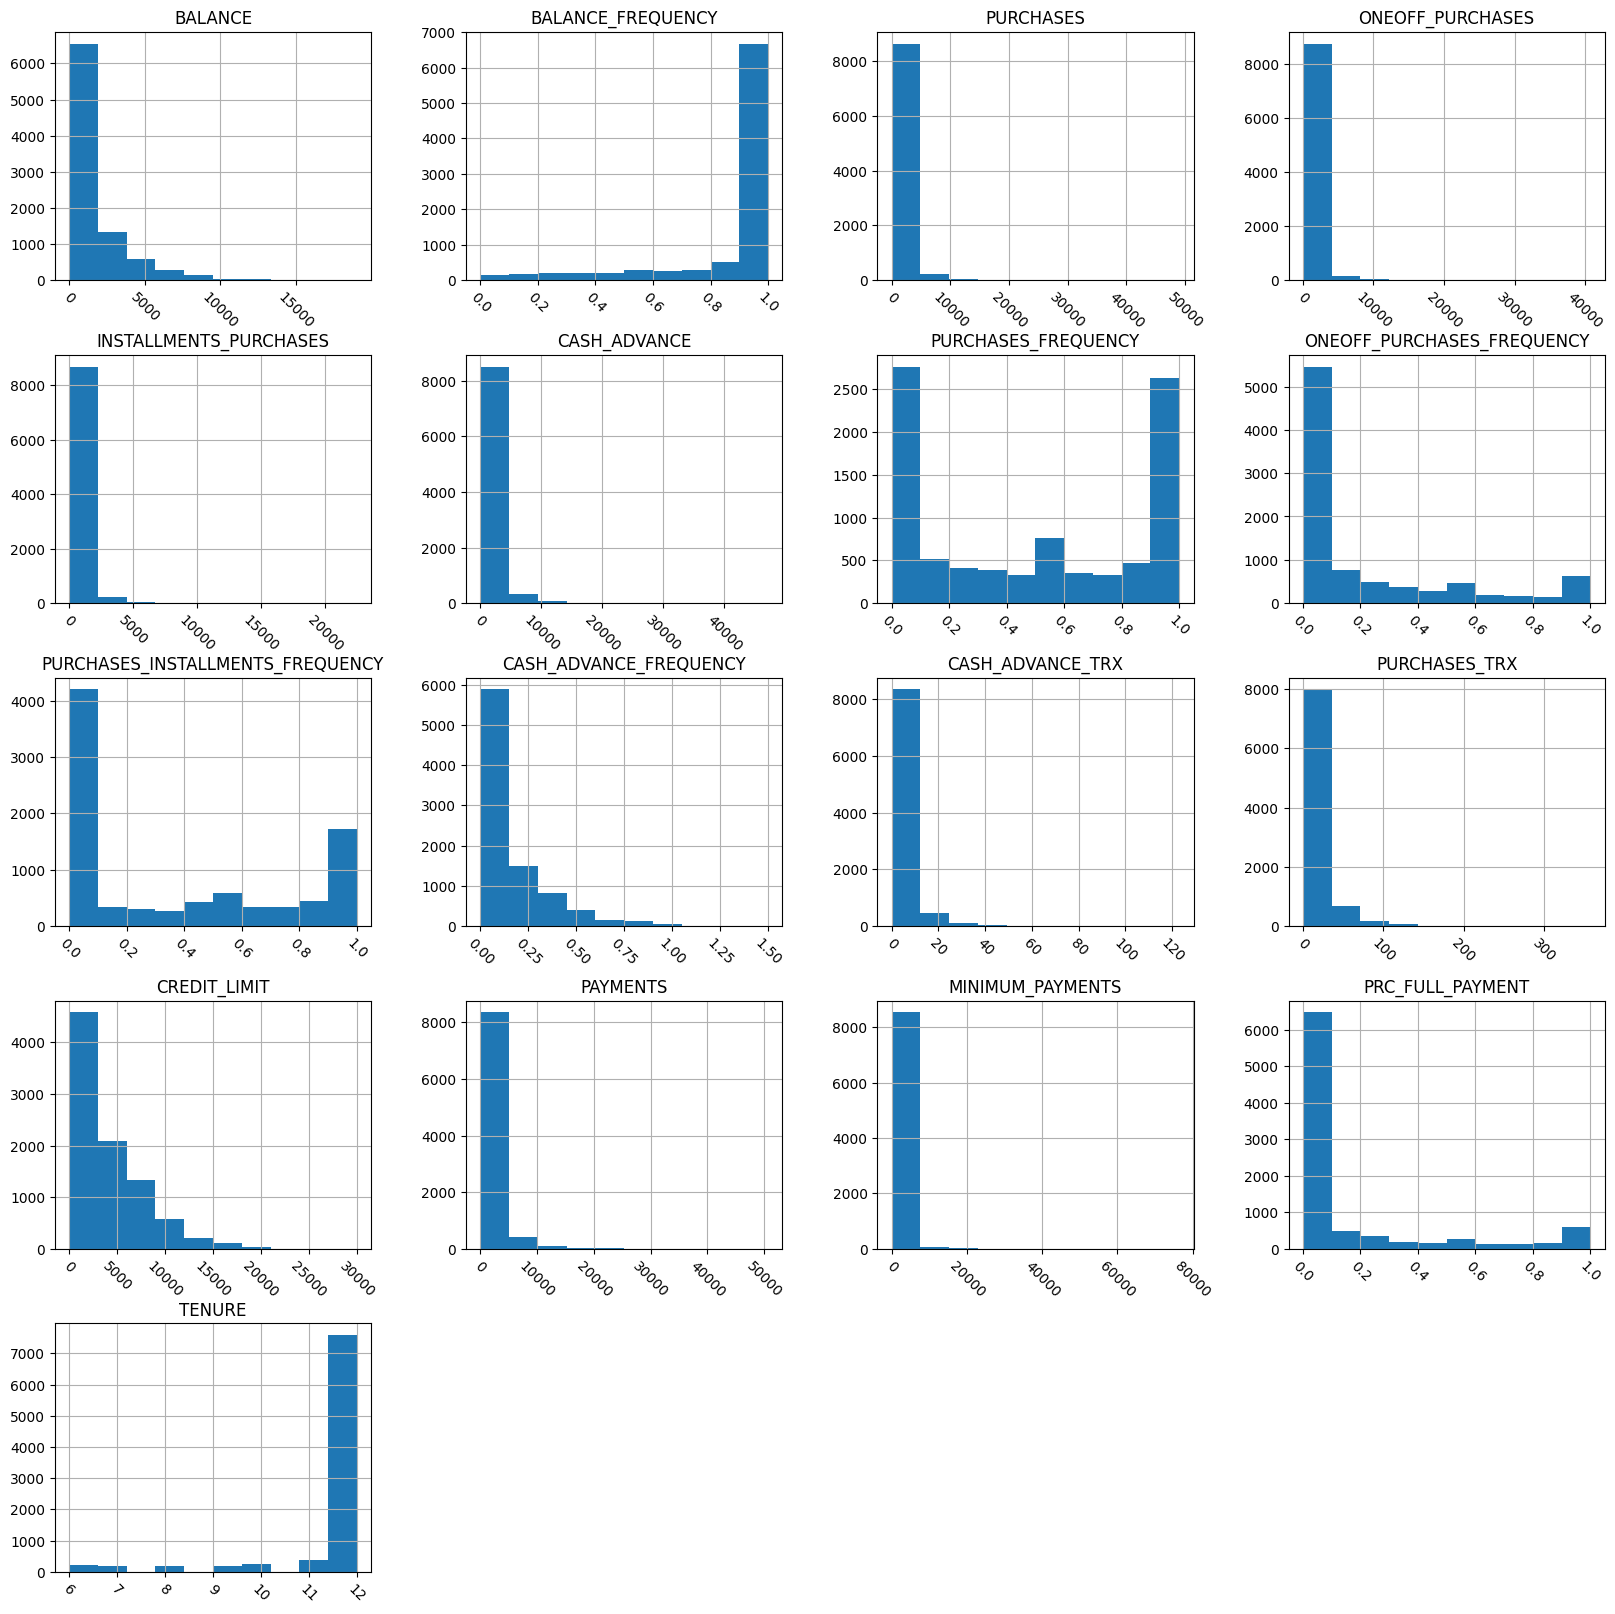

In [244]:
#Make histogram of num variabels
df.hist(figsize=(20,20), xrot=-45)

NB! Here are a few things to look out for in a histogram:
- Distributions that are unexpected
- Potential outliers that don’t make sense
- Features that should be binary (i.e. “wannabe indicator variables”)
- Boundaries that don’t make sense
- Potential measurement errors

In [245]:
#Get general statistics from df
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Q1 quantile of Y :  170.85765425
Q2 quantile (median) of Y:  335.6283125
Q3 quantile of Y :  864.2065423050828


C:\Users\jg\code\templat_reg_and_class\code\functions.py:119: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade":True}, ax=ax[0])
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\distributions.py:2517: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


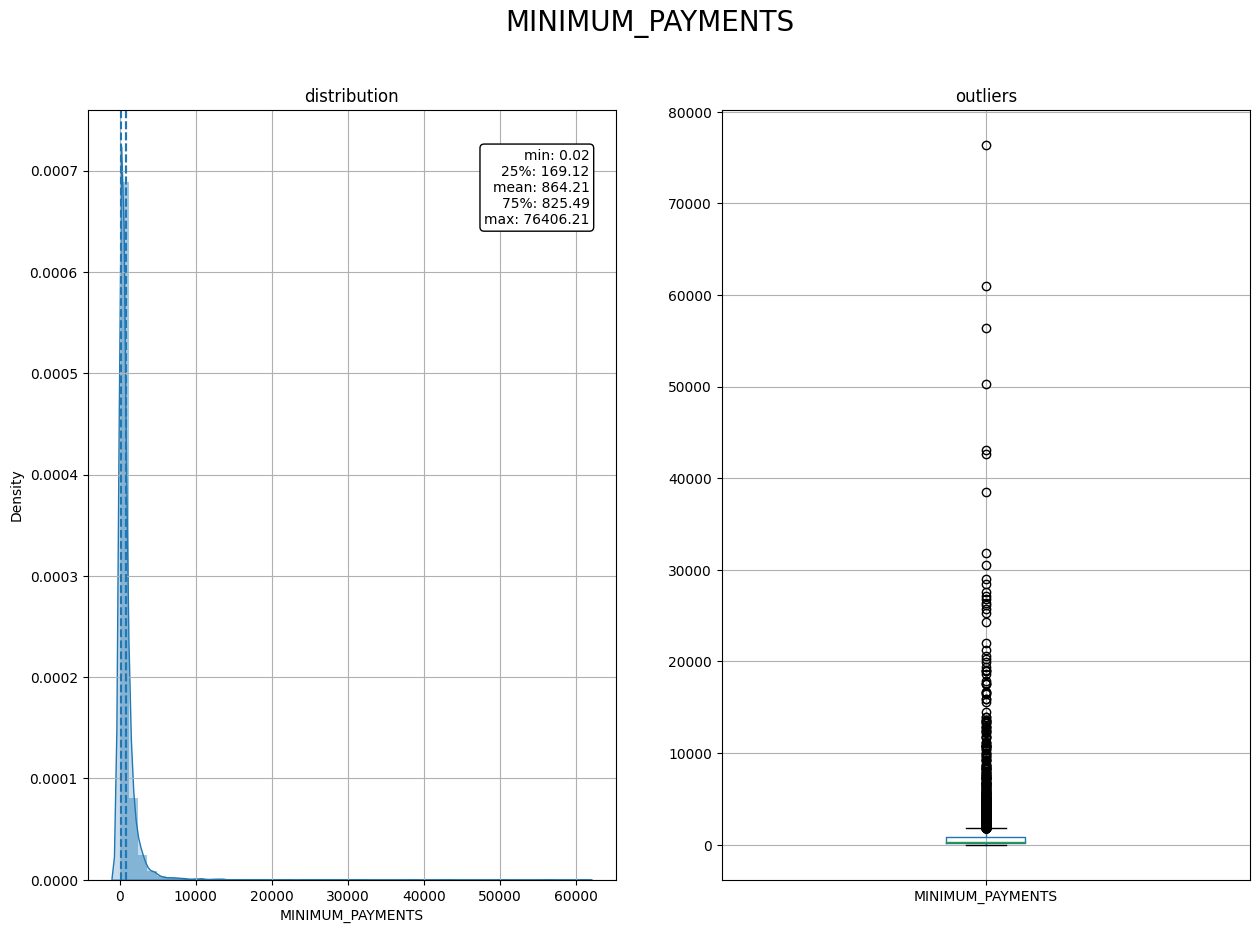

In [246]:
#Potenial extreme values
#OK: BALANCE, PURCHASES,ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE
#NOT OK: MINIMUM_PAYMENT (see next cell as to why)
from functions import freqdist_plot
freqdist_plot(dtf=df, x="MINIMUM_PAYMENTS", box_logscale=False, figsize=(15, 10), quantile_breaks=(0, 10))

In [247]:
#By exploring customers with extreme values the extreme values are consistent with everything else.
#The only extreme values that does not make sense is in MINIMUM_PAYMENTS (min is >> than actual debt/usage ++)
#e.g the customer is expected to pay a minimum sum of 50 000 dollar each month but has a credit limit on 5000
#and balance of 5000.
df[df["MINIMUM_PAYMENTS"] > 30000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10591,3457.086184,1.0,2448.60,0.00,2448.60,0.000000,1.000000,0.000000,1.0,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,12
C11170,6090.522273,1.0,22.16,22.16,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,1,9000.0,568.781100,30528.43240,0.0,12
C14499,10571.411070,1.0,7739.48,0.00,7739.48,0.000000,1.000000,0.000000,1.0,0.000000,0,44,8000.0,2688.447014,76406.20752,0.0,12
C14586,4976.028578,1.0,900.87,0.00,900.87,0.000000,1.000000,0.000000,1.0,0.000000,0,162,5500.0,92.865469,50260.75947,0.0,12
C15448,5044.179003,1.0,966.60,0.00,966.60,774.254505,1.000000,0.000000,1.0,0.083333,3,48,4500.0,3332.360525,31871.36379,0.0,12
C15815,4628.109931,1.0,912.54,0.00,912.54,0.000000,1.000000,0.000000,1.0,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,12
C15993,8038.893195,1.0,0.00,0.00,0.00,197.915586,0.000000,0.000000,0.0,0.166667,8,0,9000.0,3569.182969,43132.72823,0.0,12
C16134,6022.224462,1.0,0.00,0.00,0.00,4111.465632,0.000000,0.000000,0.0,0.166667,6,0,7000.0,4560.775720,42629.55117,0.0,12
C17325,9024.812044,1.0,0.00,0.00,0.00,2750.442399,0.000000,0.000000,0.0,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,12


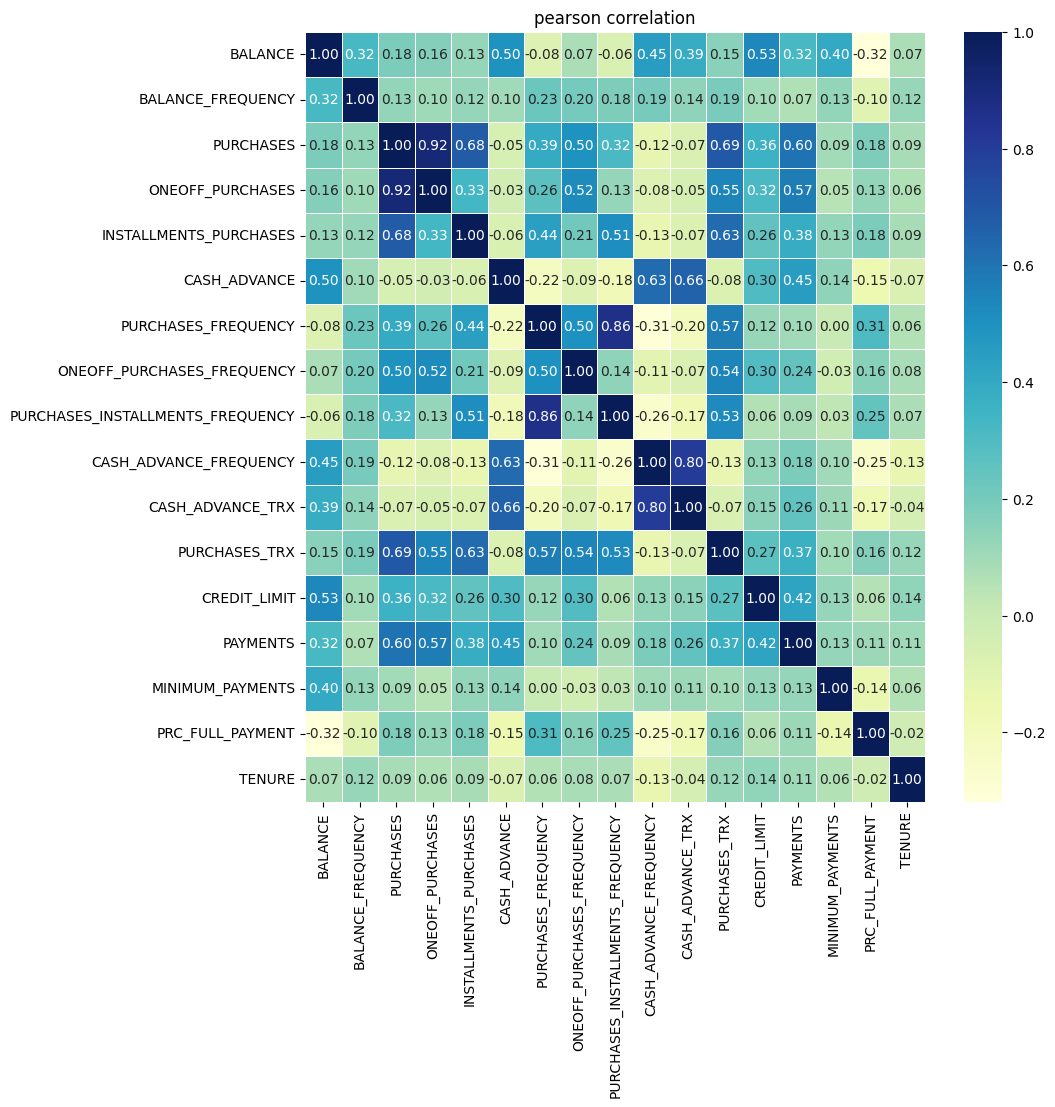

In [248]:
#Finding correlation
from functions import corr_matrix
corr = corr_matrix(df, method="pearson", negative=True, figsize=(10,10))

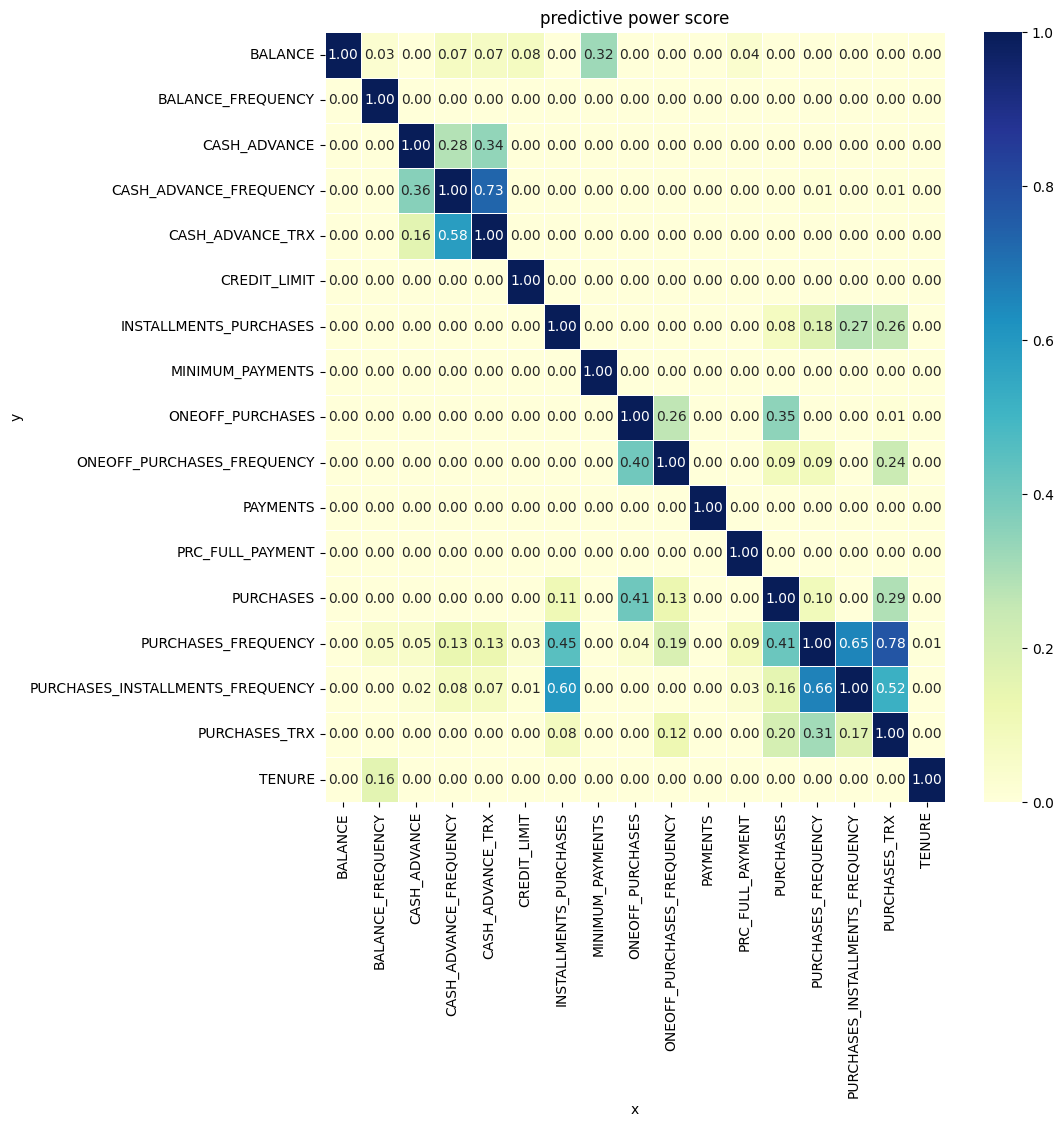

In [249]:
#Finding predictiv score
from functions import pps_matrix

pps = pps_matrix(dtf = df, figsize=(10,10))

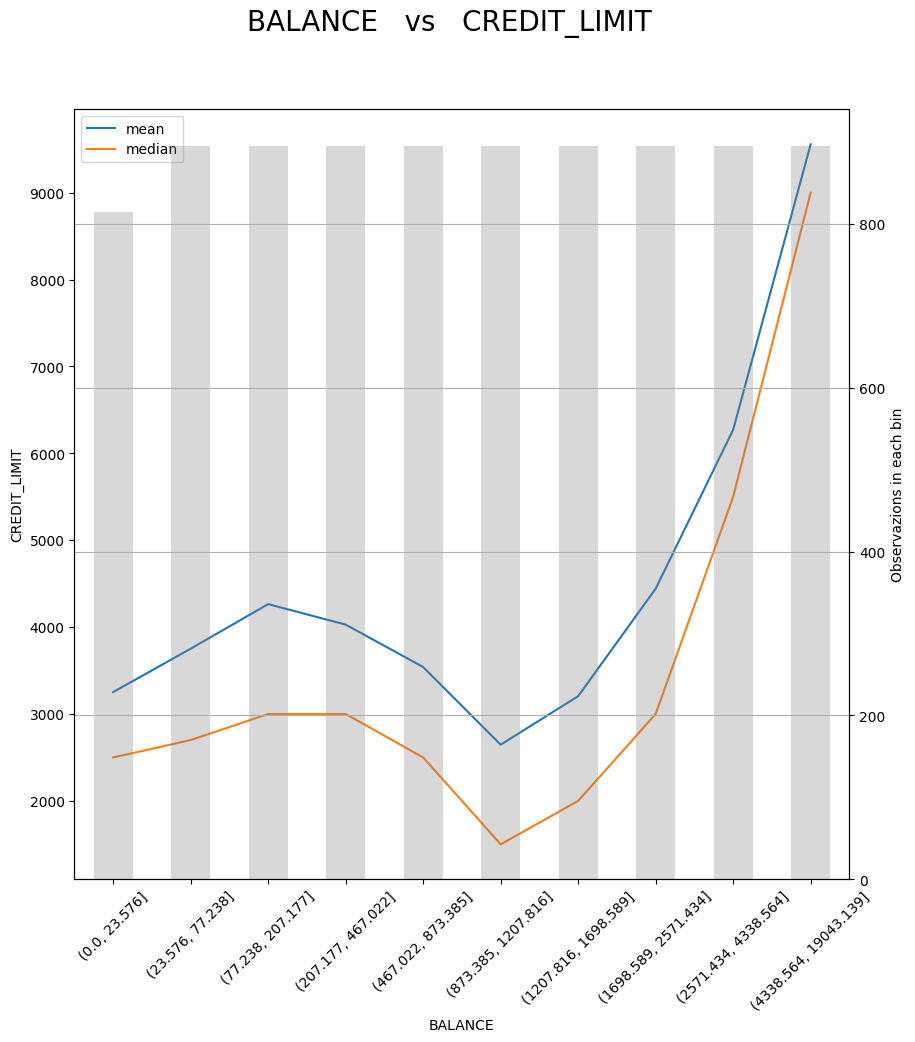

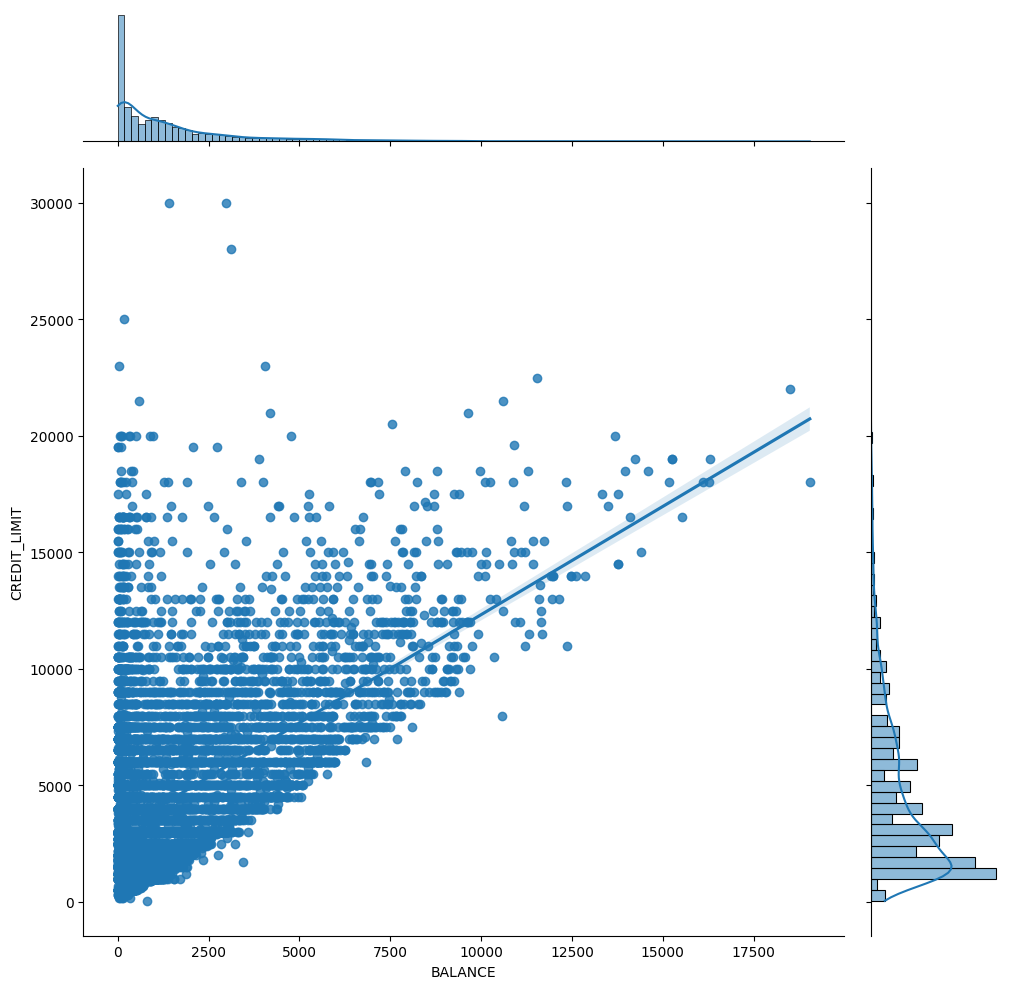

In [250]:
#Analysing strongest corr with balance
from functions import bivariate_plot
bivariate_plot(df, x="BALANCE", y="CREDIT_LIMIT", figsize=(10,10))

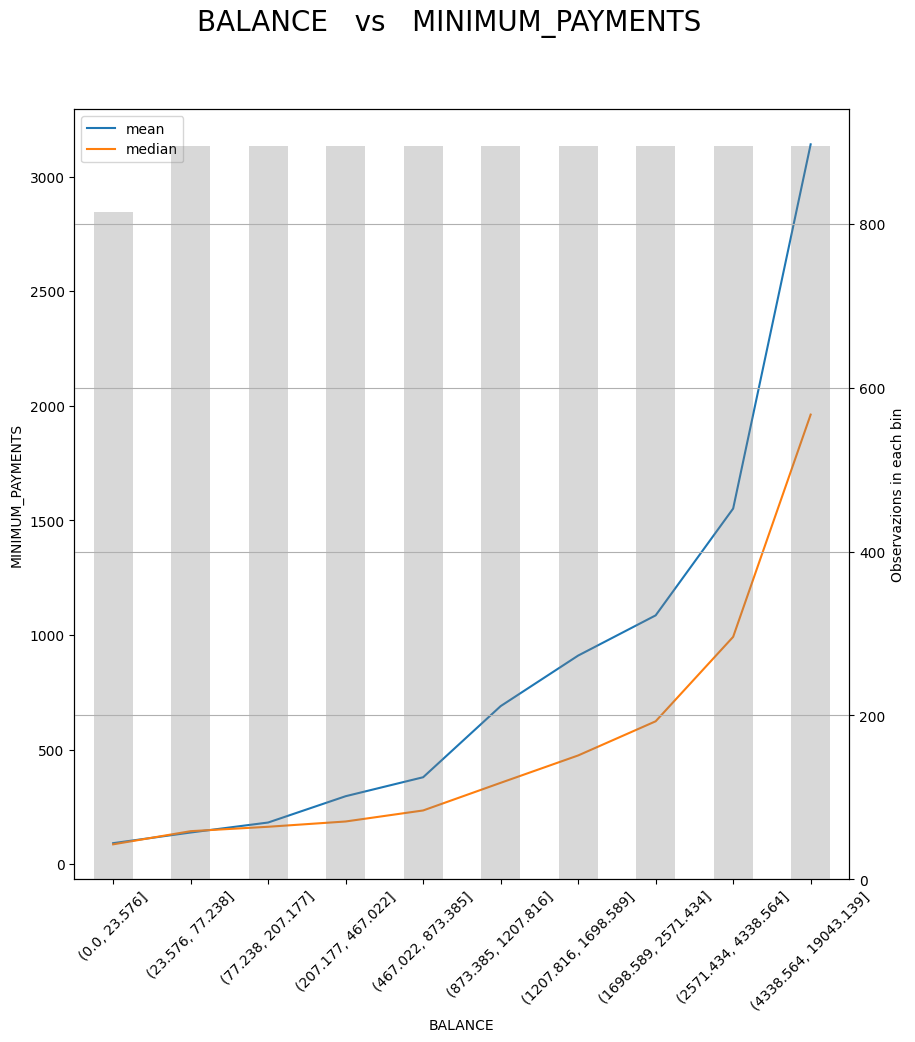

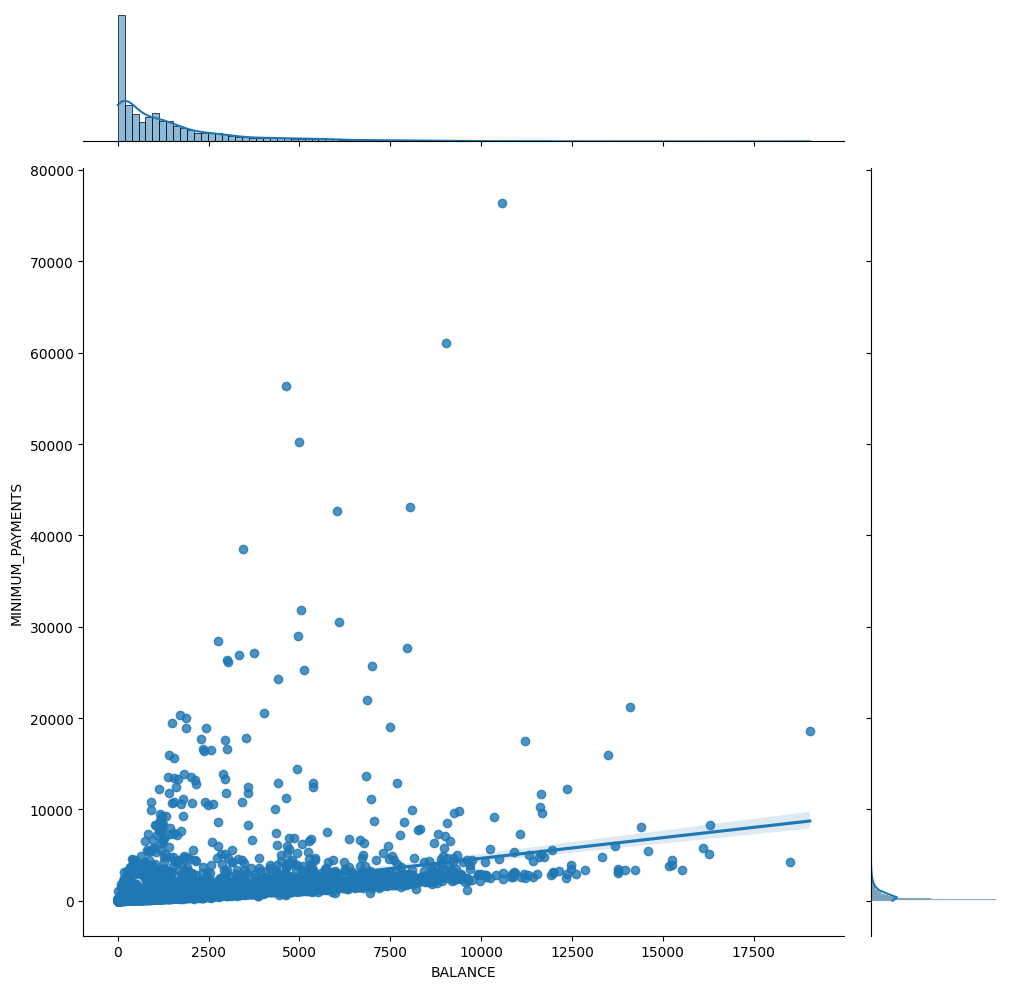

In [251]:
#Analysing highest PP with balance
from functions import bivariate_plot
bivariate_plot(df, x="BALANCE", y="MINIMUM_PAYMENTS", figsize=(10,10))

## Data Cleaning

__Remove Unwanted Observations__:
- Duplicate observations
- Irrelevant observation

__Fix Structural Errors__:
- Typos and inconsistent capitalization

__Filter Unwanted Outliers__:
- Innocent until proven guilty

__Handle missing data__:
- Catgorical data gets label "Missing!"
- Numerical gets flagged with a dummy variabel and then filled with 0.

In [252]:
#Checking for duplicates
sum(df.duplicated() == True)

0

In [253]:
#Dealing with extreme values in MINIMUM_PAYMENTS

#Print the extreme values
df[df["MINIMUM_PAYMENTS"] >= 20000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10400,7957.017218,1.000000,0.00,0.00,0.00,4909.937494,0.000000,0.000000,0.000000,0.250000,4,0,9000.0,677.144841,27631.45072,0.0,12
C10591,3457.086184,1.000000,2448.60,0.00,2448.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,12
C10724,4414.952906,1.000000,419.64,0.00,419.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4200.0,467.204852,24302.09819,0.0,12
C11170,6090.522273,1.000000,22.16,22.16,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,9000.0,568.781100,30528.43240,0.0,12
C11738,3740.907731,1.000000,0.00,0.00,0.00,116.632141,0.000000,0.000000,0.000000,0.083333,1,0,4000.0,128.371777,27146.02678,0.0,12
C12497,3034.686119,1.000000,0.00,0.00,0.00,370.098258,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,91.692752,26143.17049,0.0,12
C12853,2748.868773,1.000000,598.50,598.50,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,34,2000.0,518.300462,28483.25483,0.0,12
C12868,3003.711667,1.000000,349.45,0.00,349.45,0.000000,0.636364,0.000000,0.636364,0.000000,0,7,2750.0,195.830629,26378.90782,0.0,11
C13914,14100.251100,1.000000,4995.80,3403.11,1592.69,20712.670080,1.000000,1.000000,0.333333,0.833333,36,34,16500.0,20418.332380,21235.06530,0.0,12


In [254]:
#Looking at customers that have a much higher MINIMUM_PAYEMENT than observerd usage
cust_extre_lst = []
for index,row in df.iterrows():
    if row["MINIMUM_PAYMENTS"] > (row["BALANCE"] + row["PURCHASES"] + row["ONEOFF_PURCHASES"] + row["CASH_ADVANCE"]
                                  + row["INSTALLMENTS_PURCHASES"])*10:
        print("Index :", index)
        print("Row :", row)
        cust_extre_lst.append(index)
print(cust_extre_lst)

#There are two cases for MINIMUM_PAYMENTS:
# 1. There is something wrong since the MINIMUM_PAYEMENT is much higher than the actual usage
# 2. The MINIMUM_PAYEMENT is based on something else e.g credit score or earlier usage not included in the data.

Index : C11900
Row : BALANCE                               915.717703
BALANCE_FREQUENCY                       1.000000
PURCHASES                              55.490000
ONEOFF_PURCHASES                        0.000000
INSTALLMENTS_PURCHASES                 55.490000
CASH_ADVANCE                            0.000000
PURCHASES_FREQUENCY                     0.416667
ONEOFF_PURCHASES_FREQUENCY              0.000000
PURCHASES_INSTALLMENTS_FREQUENCY        0.416667
CASH_ADVANCE_FREQUENCY                  0.000000
CASH_ADVANCE_TRX                        0.000000
PURCHASES_TRX                           7.000000
CREDIT_LIMIT                         1000.000000
PAYMENTS                             1221.513652
MINIMUM_PAYMENTS                    10800.046190
PRC_FULL_PAYMENT                        0.083333
TENURE                                 12.000000
Name: C11900, dtype: float64
Index : C13691
Row : BALANCE                                1.869435
BALANCE_FREQUENCY                      0.454545


In [255]:
#Going with option 1 and removing those outliers
df = df[df["MINIMUM_PAYMENTS"] < 20000]

#Removing customer from foor loop
df = df[~df.index.isin(cust_extre_lst)]

df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [256]:
#Handling missing data
print("Missing values in numerical feature:", df.select_dtypes(include=["float"]).isnull().sum())

Missing values in numerical feature: BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [257]:
#Remove the one row with Nan in CREDIT_LIMIT
df = df.dropna()

In [258]:
#Handling missing data
print("Missing values in numerical feature:", df.select_dtypes(include=["float"]).isnull().sum())

Missing values in numerical feature: BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


## Feature Engineering

__Create Intercation Features__:
- Combine two or more features

__Combine Sparse Classes__:
- Sparse classes (in categorical features) are those that have very few total observations.
- Rule of thumb: Combine untl each has at least 50 observations.

__Add Dummy Variables__:
- Create dummy/indicator variables for categorical features.

__Remove Unused Features__:
- Unused in this contex means:
1) ID columns
2) Features that wouldent be available at the time of prediction
3) Other text descriptions

In [259]:
#Scaling columns to have value between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cop = df.copy()
df_cop[['BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT','PAYMENTS', 'MINIMUM_PAYMENTS','TENURE']] = scaler.fit_transform(df_cop[['BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT','PAYMENTS', 'MINIMUM_PAYMENTS','TENURE']])

## Algorithm Selection

Typical algorithms include:
- KMeans
- Hierarchical Clustering
- DBSCAN
- Gaussian Mixture Clustering


## Model Training
__Fit and Tune models__:
- Use cross validation to find the best set of hyperparameters for each model.

__Evalute each model__:
- Must have a ground truth.

### K-means clustering

Clustering algorithm that is **partional** e.g divides data objects into nonoverlapping groups. It is also **nondeterministic**, meaning they could produce different results from two separate runs even if the runs were based on the same input.

__Strengths__:
    - They work well when clusters have a spherical shape
    - They’re scalable with respect to algorithm complexity (Able to maintain the samme efficiency when workload grows)


__Weakness__:
    - They’re not well suited for clusters with complex shapes and different sizes
    - They break down when used with clusters of different densities.

__How it works__:

1: Identify number of $k$ clusters in data.
2: Algorithm randomly initialize k centroids (k random data points).
3: Measure distance between each datapoint and centroids, data point is assigned to closest centroid
4: Measure new centroid (mean) for the clusters
5: Steps 3-4 i repeated until mean does not change.
6: The clusters are then measured using Sum of squared error (SSE):
$$
    \sum(x-\bar{x})^2

$$

The process (1-6) repeated $n$ times. The clustering with the lowest SSE is then choosen.

__Find a K__:
    - *The elbow method*: The process (1-6) is repeated for different values of $k$, the $k$ value giving the lowest SSE is choosen.
    - *Silhouette Score*: The process (1-6) is repeated for different values of $k$, the $k$ value giving the highest mean of the Sillhouette Coefficient for each sample belonging to different clusters is choosen. The Silhouette score is a value between -1 and 1 where 1 indicates a dense and well seperated clusters, 0 indicates that clusters are overlapping and -1 indicates that some data may be in wrong clusters.
    NB: Each one can be used to find the best k.

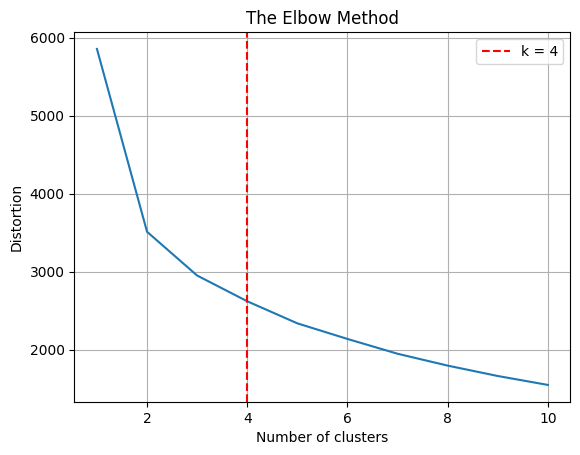

Best number of cluster : 4


In [260]:
#The elbow method
from functions import find_best_k
find_best_k(df_cop, max_k=10,plot=True, elbow=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Parameter: {'n_clusters': 2} Score 0.3767955704958967
------------
Parameter: {'n_clusters': 3} Score 0.36058557659100154
------------
Parameter: {'n_clusters': 4} Score 0.303259683974403
------------
Parameter: {'n_clusters': 5} Score 0.29650523092588305
------------
Parameter: {'n_clusters': 6} Score 0.2723432786285339
------------
Parameter: {'n_clusters': 7} Score 0.3156117676731704
------------
Parameter: {'n_clusters': 8} Score 0.29481416183704207
------------
Parameter: {'n_clusters': 9} Score 0.3129031803058206
------------
Parameter: {'n_clusters': 10} Score 0.3123313078341077
------------


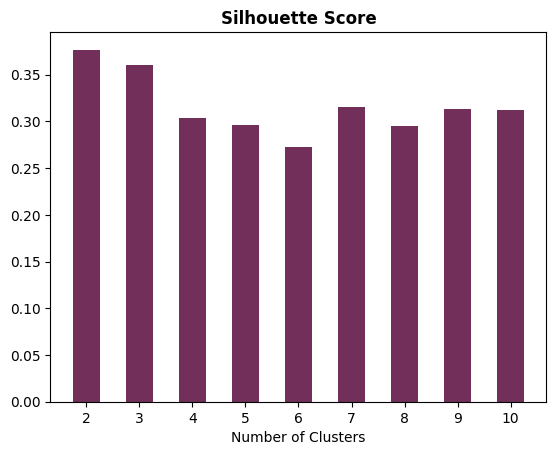

Best number of clusters : 2


In [261]:
#The Silhouette Method
%load_ext autoreload
from functions import find_best_k
%autoreload 2

find_best_k(df_cop, max_k=10,plot=True, elbow=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- found 4 clusters ---
cluster
1    3561
2    2543
0    1399
3    1105
Name: cluster, dtype: int64


C:\Users\jg\code\templat_reg_and_class\code\functions.py:725: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


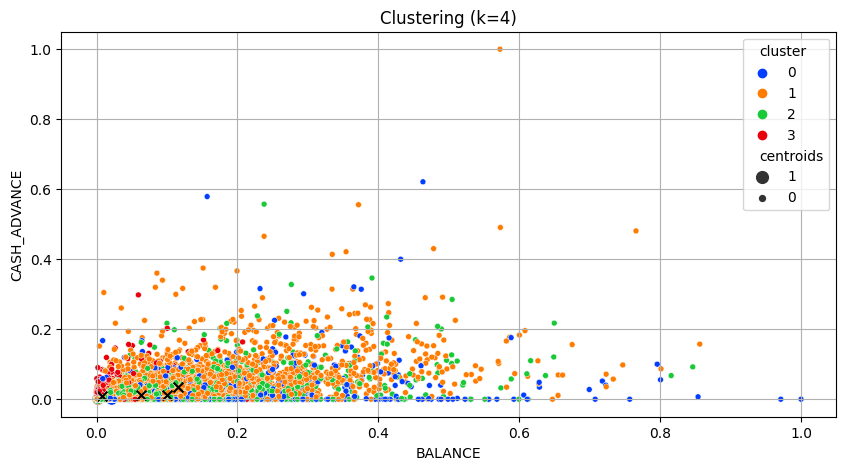

In [305]:
#Define model with optimal clusters
from sklearn.cluster import KMeans
best_model = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

#Plot clusters
%load_ext autoreload
from functions import fit_ml_cluster
%autoreload 2
model, df_clusters, col_cluster = fit_ml_cluster(X = df_cop, model=best_model, figsize=(10,5), lst_2Dplot=["BALANCE", "CASH_ADVANCE"])

In [302]:
#Adding the clusters to original df
df["clusters"] = df_clusters["cluster"]
df

C:\Users\jg\AppData\Local\Temp\ipykernel_14704\320927710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clusters"] = df_clusters["cluster"]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,3
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\jg\code\templat_reg_and_class\venv\

BALANCE                                                              \
           count         mean          std      min         25%          50%   
clusters                                                                       
0         1399.0  1918.036218  2460.772789  0.41367  287.955728   931.674532   
1         3561.0  2189.301702  2131.382100  0.48805  827.662150  1469.212816   
2         2543.0  1194.536322  1827.285122  0.00000   74.236655   435.905875   
3         1105.0   161.591686   365.899940  0.00000   11.785690    38.686350   

                                    BALANCE_FREQUENCY            ...  \
                  75%           max             count      mean  ...   
clusters                                                         ...   
0         2579.285047  19043.138560            1399.0  0.977028  ...   
1         2817.403474  16304.889250            3561.0  0.964912  ...   
2         1473.519059  16115.596400            2543.0  0.946248  ...   
3          132.730466   4060.710208            1105.0  0.447085  ...   

         PRC_FULL_PAYMENT            TENURE                                  \
                      75%       max   count       mean       std  min   25%   
clusters                                                                      
0                   0.500  1.000000  1399.0  11.744103  0.994401  6.0  12.0   
1                   0.000  0.916667  3561.0  11.477113  1.358947  6.0  12.0   
2                   0.375  1.000000  2543.0  11.516713  1.371716  6.0  12.0   
3                   0.500  1.000000  1105.0  11.484163  1.351989  6.0  12.0   

                            
           50%   75%   max  
clusters                    
0         12.0  12.0  12.0  
1         12.0  12.0  12.0  
2         12.0  12.0  12.0  
3         12.0  12.0  12.0  

[4 rows x 136 columns]

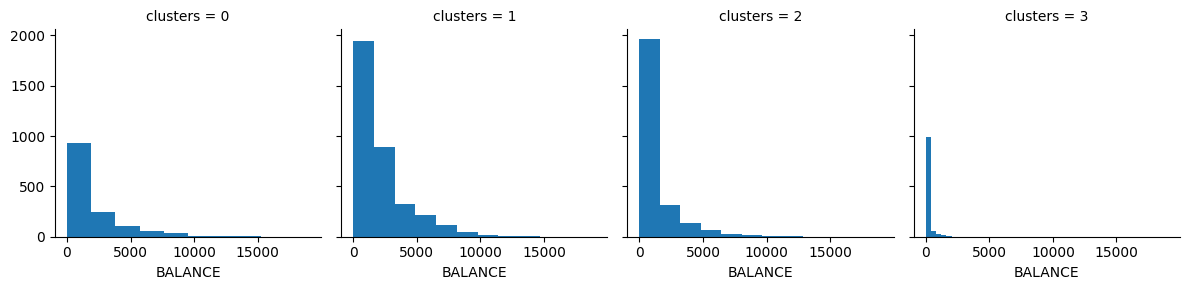

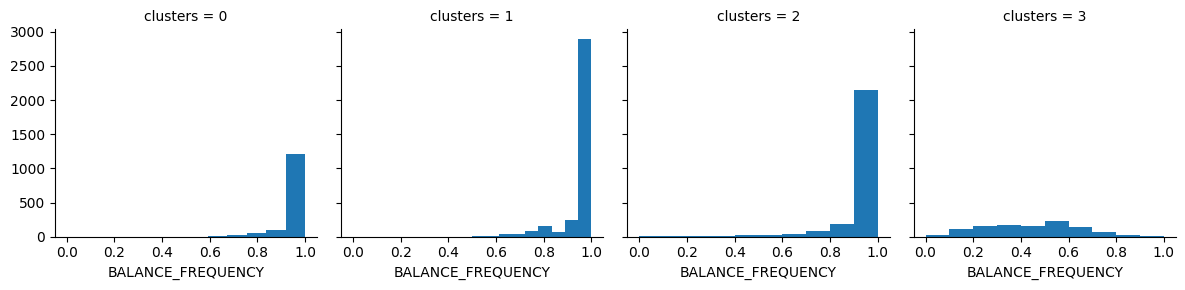

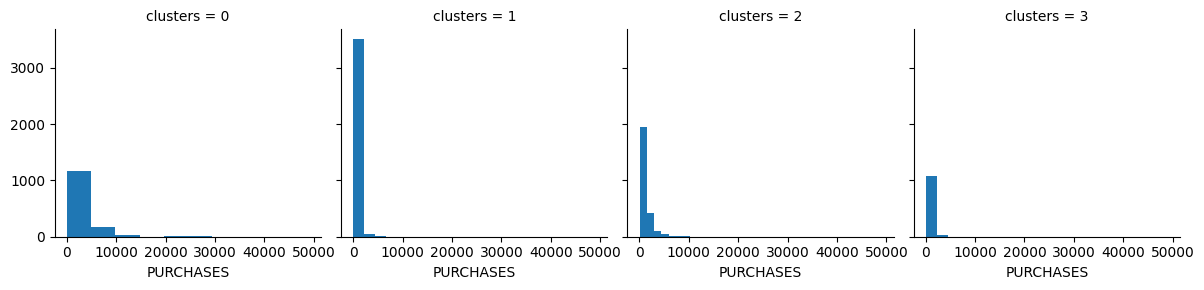

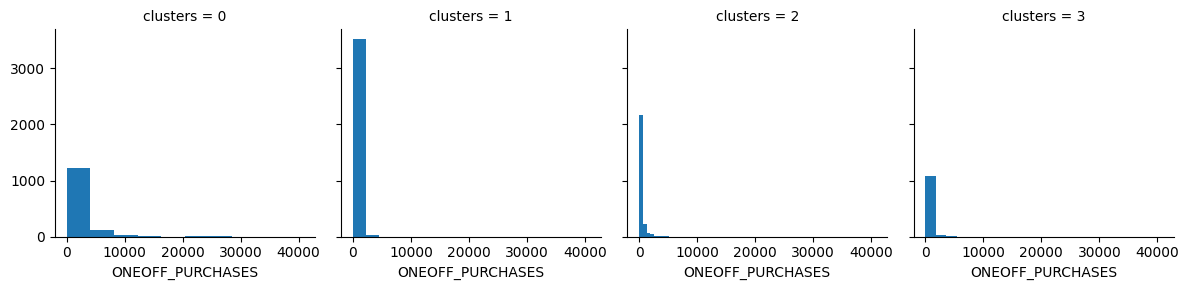

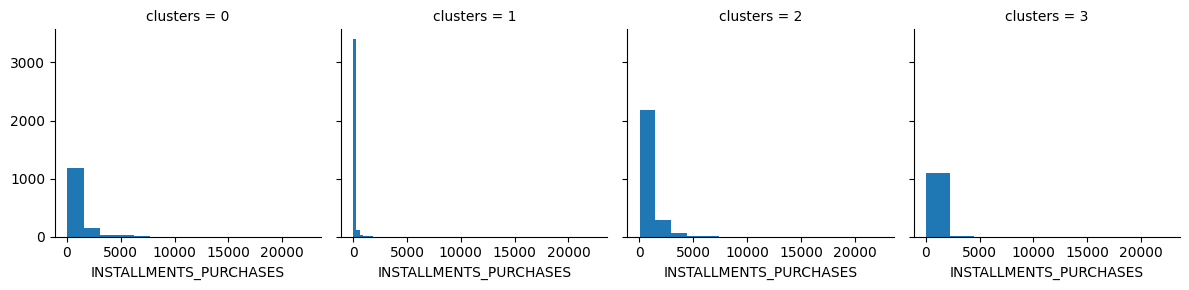

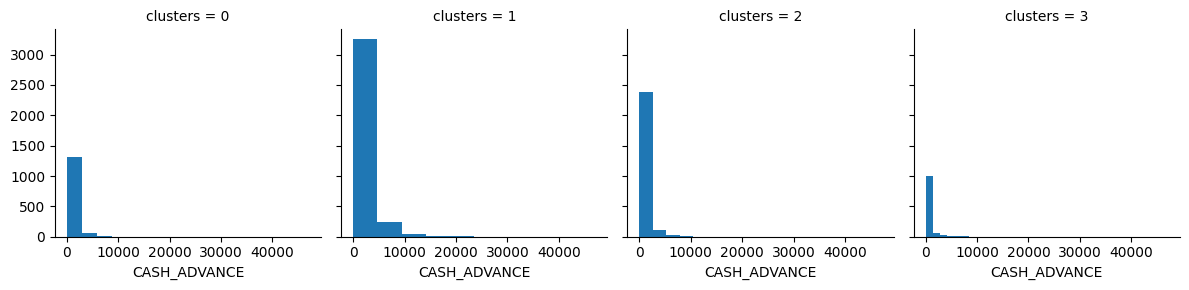

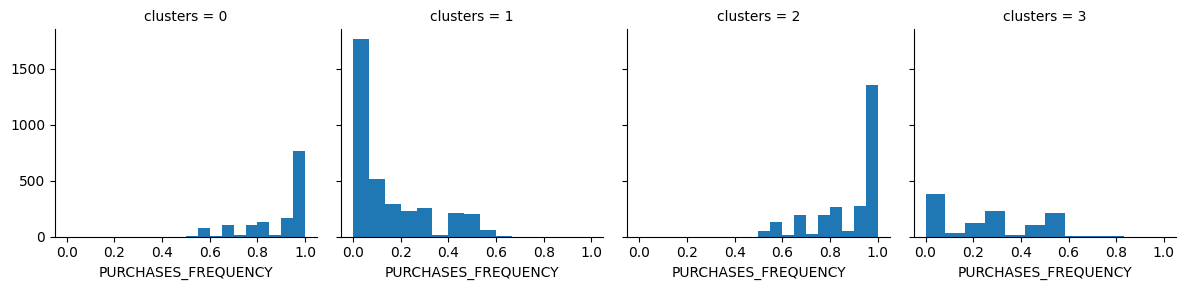

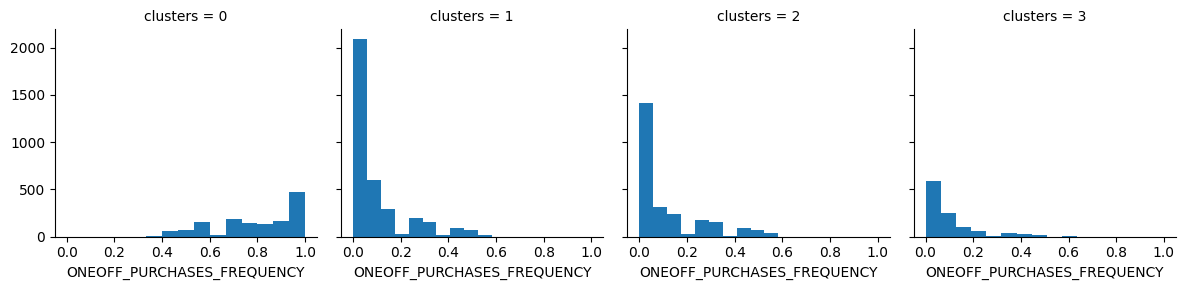

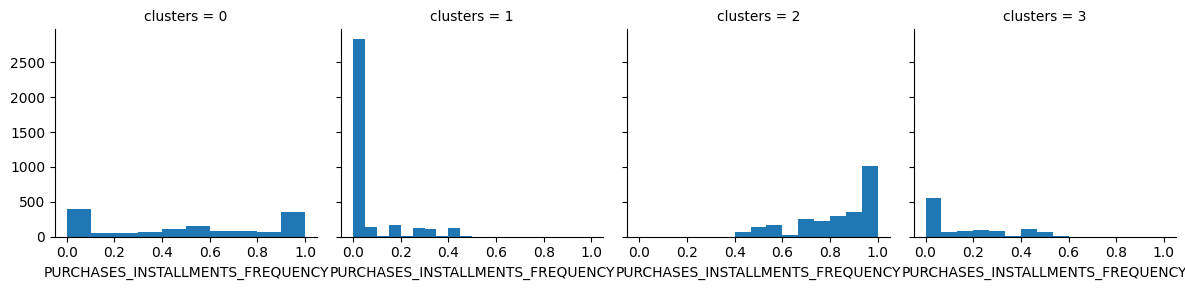

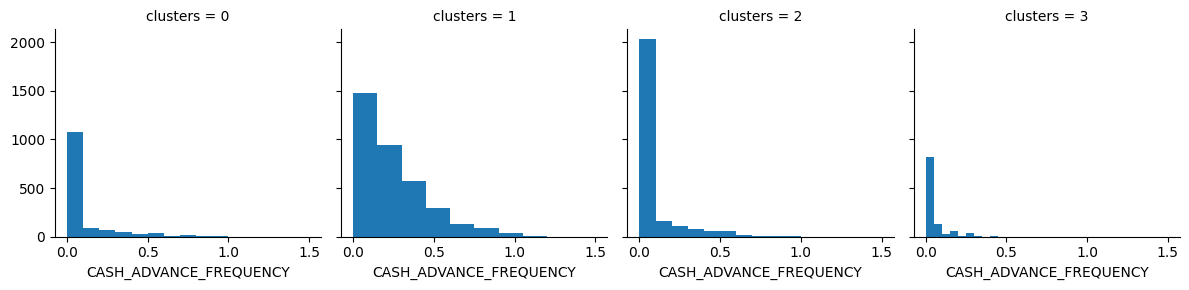

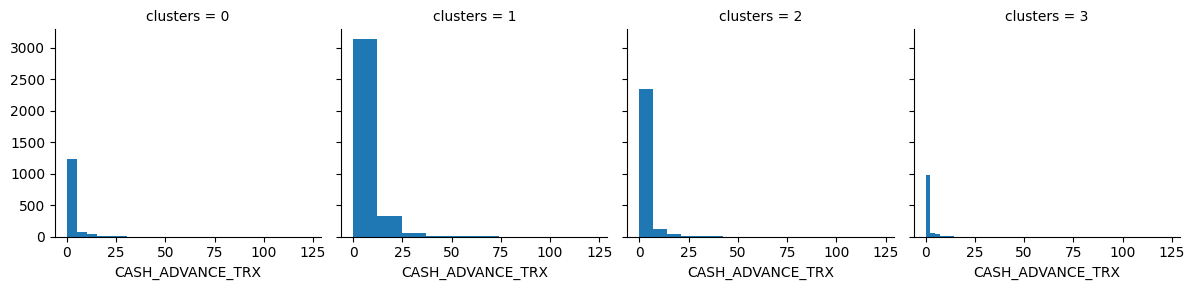

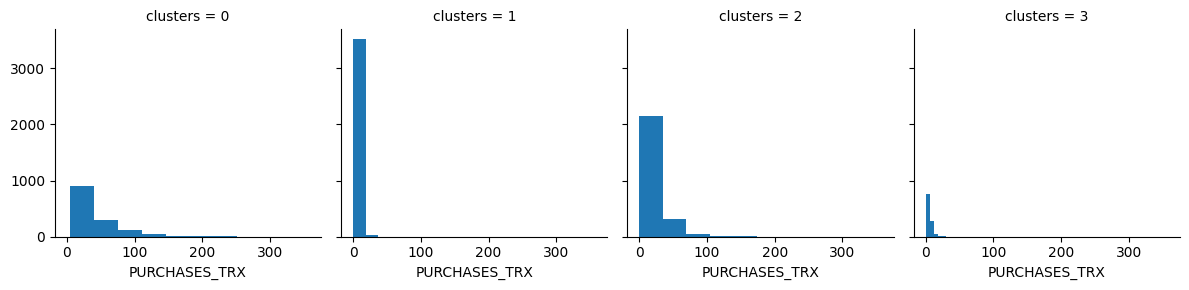

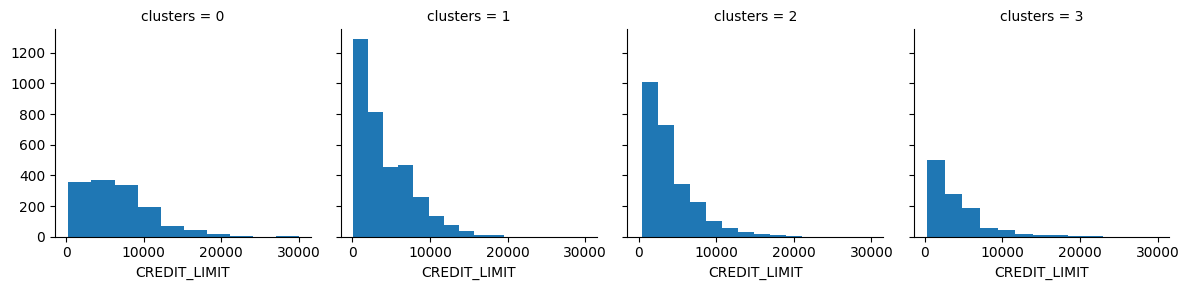

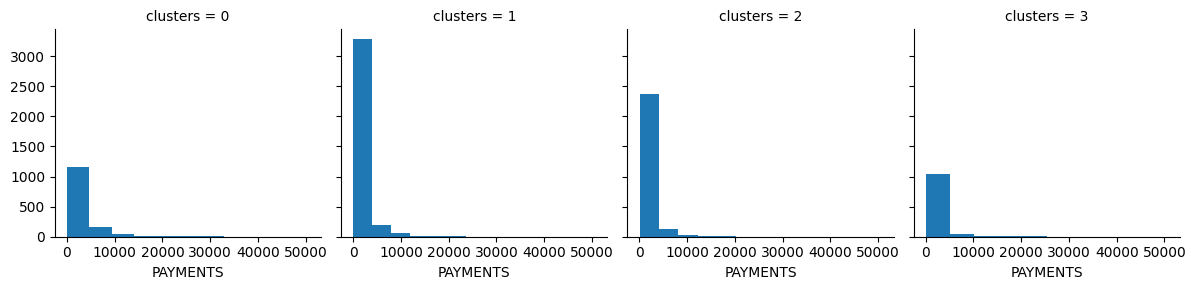

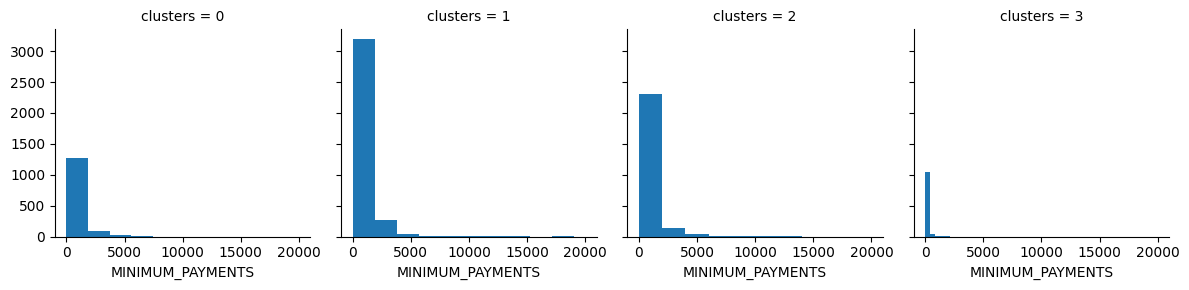

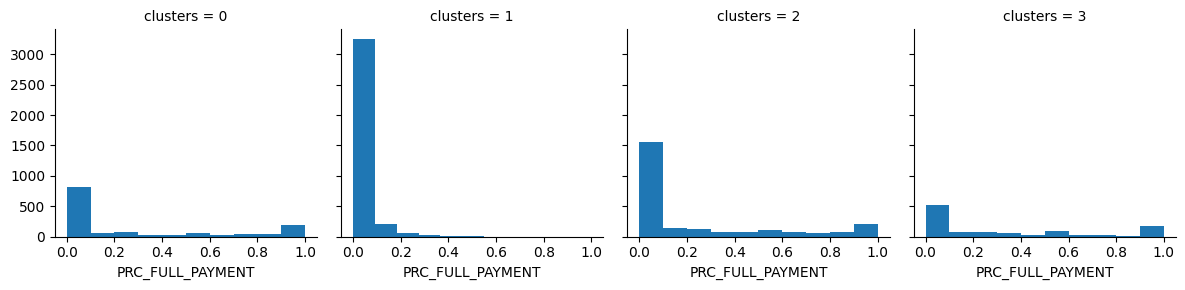

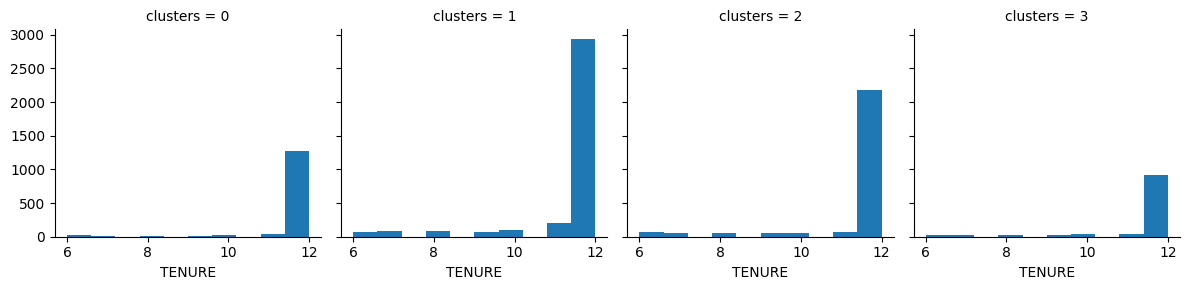

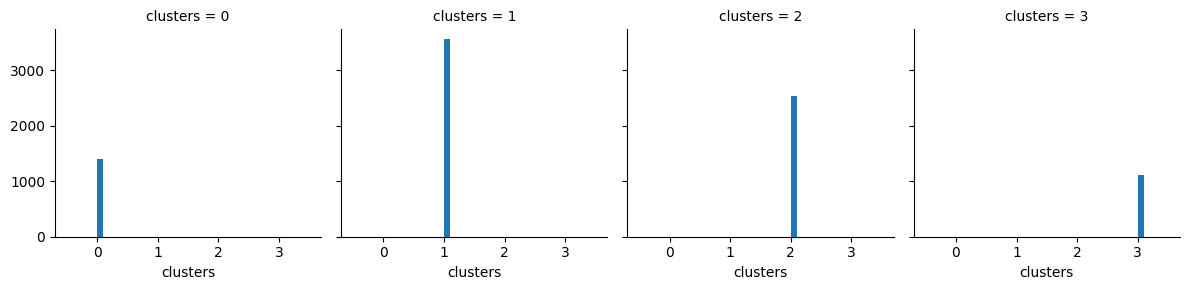

In [317]:
#Interpretation of Clusters
%load_ext autoreload
from functions import inter_clusters
%autoreload 2
inter_clusters(df = df, col_with_clus= "clusters")

#### Analysis of clusters from K means

By setting up statistics in an Excel sheet the following characteristics is in the different clusters:

__Cluster 0__: Very active customers that have high expenses and not afraid of debt. Good at paying back.
__Cluster 1__: Active usage of card, but not much on purchases. Uses mostly "Cash Advance" for debt. Bad at paying back.
__Cluster 2__: Average usages but often uses "Purchases" and "OneOff" (for high values), pays off a lot by installment. Good at paying back.
__Cluster 3__: Somewhat passive customers. Good at paying back.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape after PCA red :  (8608, 2)


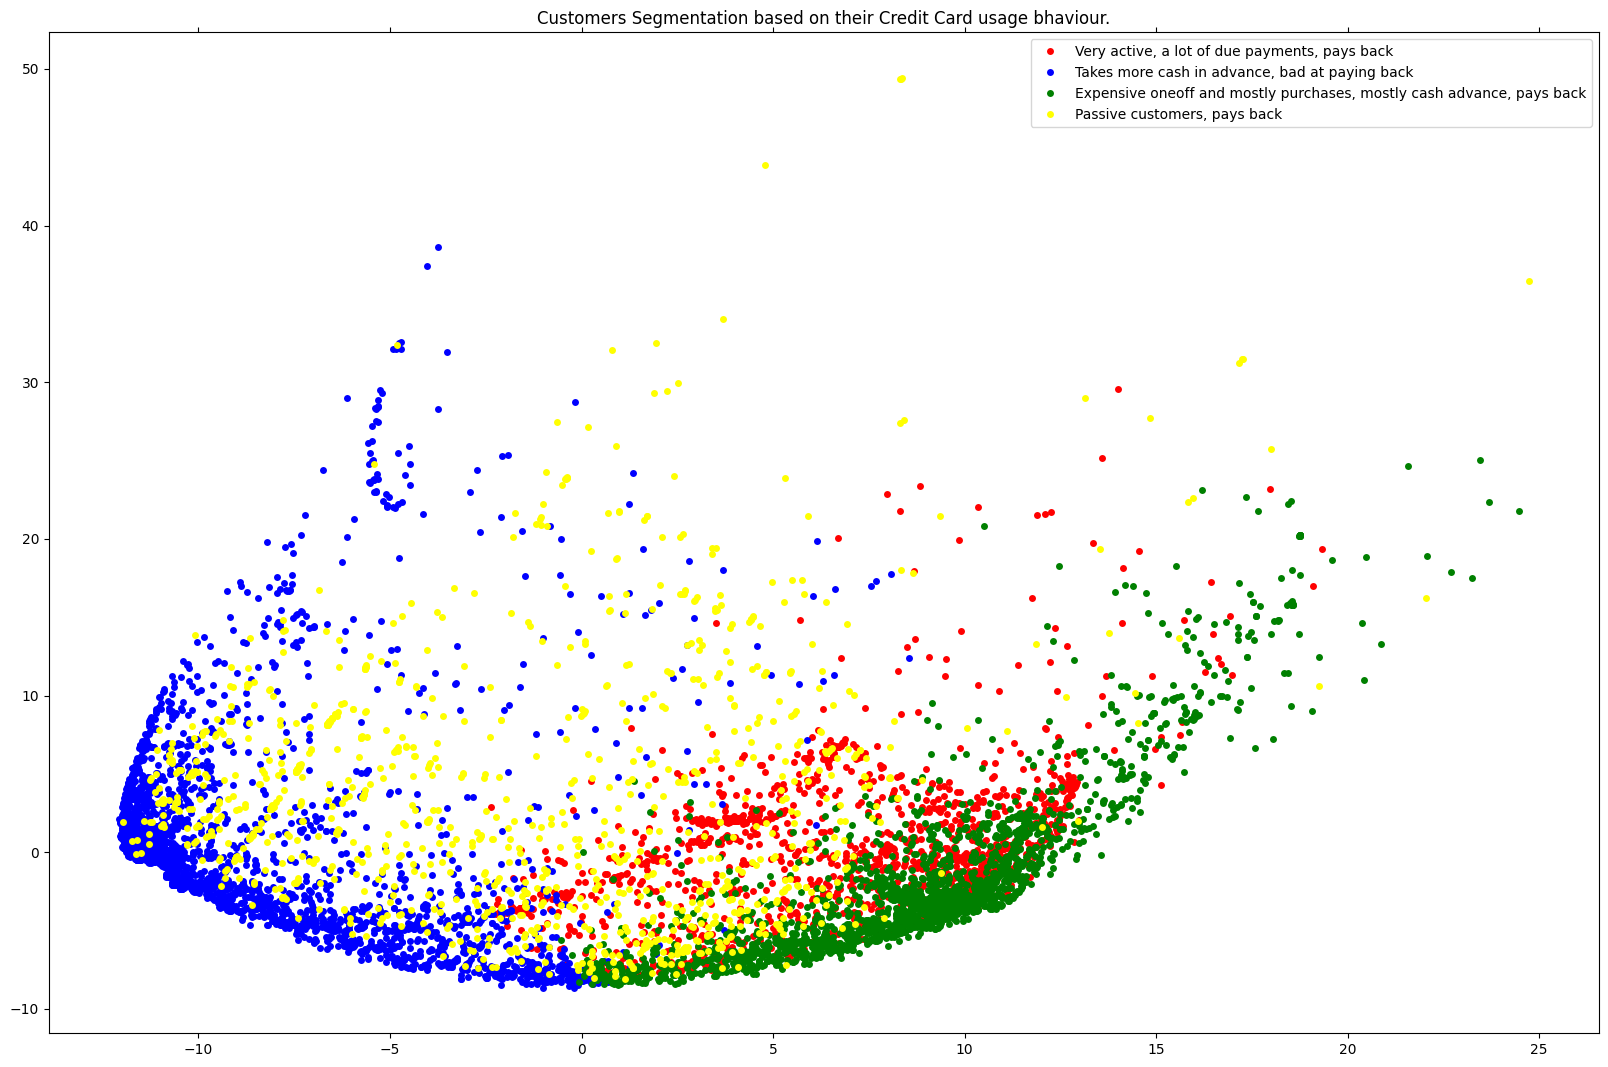

In [323]:
#Visualization using PCA

#Defin colors for groups
colors = {0: 'red',
          1: 'blue',
          2: 'green',
          3: 'yellow'}

#Define labels for groups
names = {0: 'Very active, a lot of due payments, pays back',
         1: 'Takes more cash in advance, bad at paying back',
         2: 'Expensive oneoff and mostly purchases, mostly cash advance, pays back',
         3: 'Passive customers, pays back'}

#Getting function
%load_ext autoreload
from functions import visual_clusters_pca
%autoreload 2
visual_clusters_pca(df_cop,best_model.labels_, colors, names)

### Hierarchical Clustering


__Strenghts__:
    - It is to understand and implement.
    - We don’t have to pre-specify any particular number of clusters.
    - Can obtain any desired number of clusters by cutting the Dendrogram at the proper level.
    - They may correspond to meaningful classification.
    - Easy to decide the number of clusters by merely looking at the Dendrogram.


__Weakness__:
    - Hierarchical Clustering does not work well on vast amounts of data.
    - All the approaches to calculate the similarity between clusters have their own disadvantages.
    - In hierarchical Clustering, once a decision is made to combine two clusters, it can not be undone.
    - Different measures have problems with one or more of the following:
        - Sensitivity to noise and outliers.
        - Faces Difficulty when handling with different sizes of clusters.
        - It is breaking large clusters.
        - In this technique, the order of the data has an impact on the final results.

There are mainly two types of hierarchical clustering:
    - Agglomerative hierarchical clustering
    - Divisive Hierarchical clustering

This notebook is focused on Agglomerative clustering.

__How it works__:
    1) Having 1 cluster for each data point
    2) Defining new cluster centers using the mean of X and Y coordinates
    3) Combining clusters centers closest to each other
    4) Finding new cluster centers based on the mean
    5) Repeating until optimal number of clusters is met





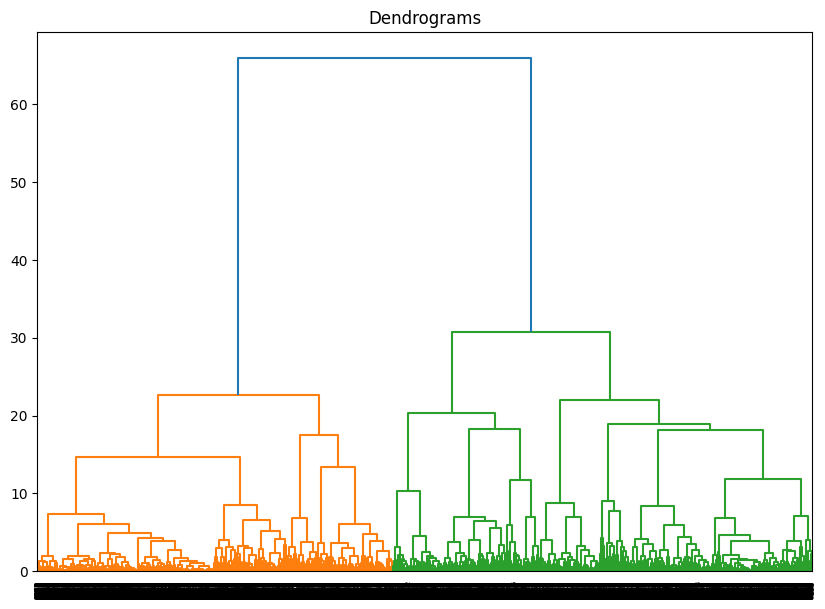

In [324]:
#Import function
from functions import hierar_clust_dendo
hierar_clust_dendo(df_cop, 'ward')

C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\jg\code\templat_reg_and_class\venv\

BALANCE                                                          \
              count         mean          std  min         25%          50%   
clusters_hi                                                                   
0            4660.0  1363.700449  2010.046435  0.0  100.190327   562.802495   
1            3948.0  1859.386175  2135.884449  0.0  336.483445  1172.546004   

                                      BALANCE_FREQUENCY            ... TENURE  \
                     75%          max             count      mean  ...    75%   
clusters_hi                                                        ...          
0            1727.547281  19043.13856            4660.0  0.935775  ...   12.0   
1            2525.541090  16304.88925            3948.0  0.846641  ...   12.0   

                  clusters                                               
              max    count      mean       std  min  25%  50%  75%  max  
clusters_hi                                                              
0            12.0   4660.0  1.384335  0.982423  0.0  0.0  2.0  2.0  3.0  
1            12.0   3948.0  1.395897  0.805072  0.0  1.0  1.0  1.0  3.0  

[2 rows x 144 columns]

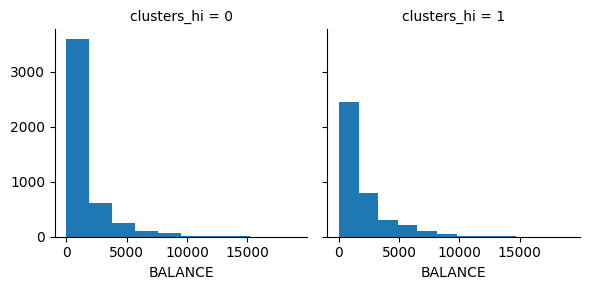

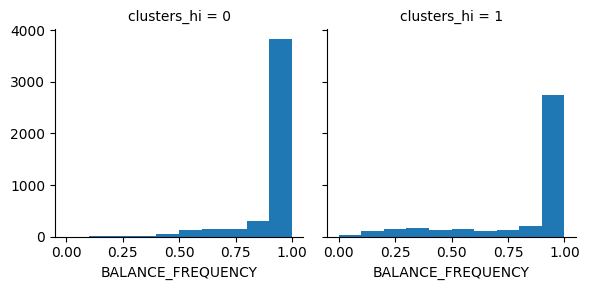

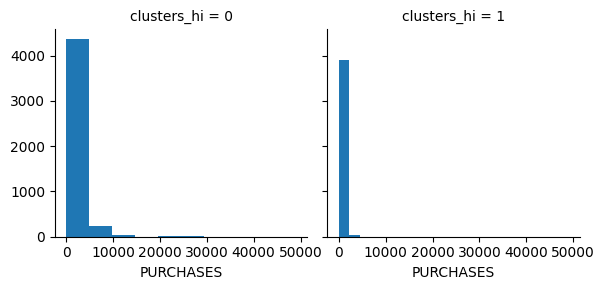

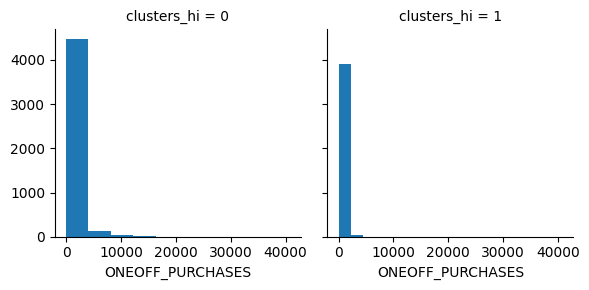

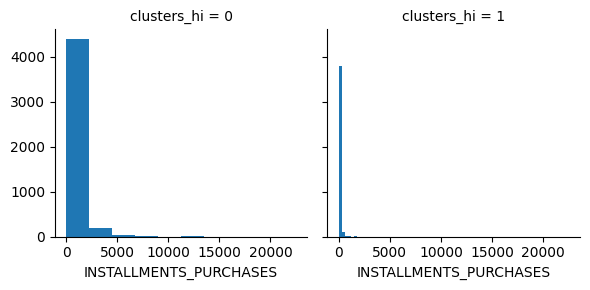

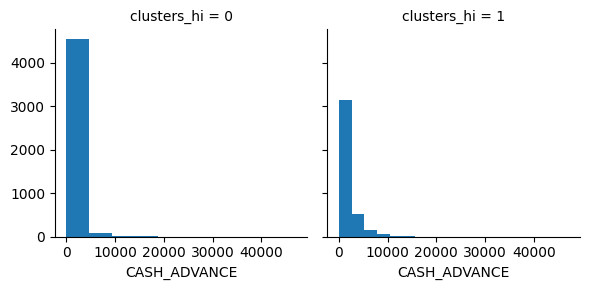

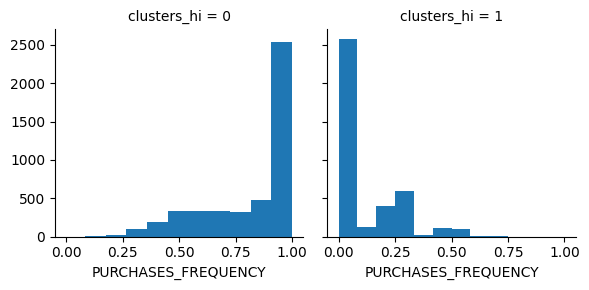

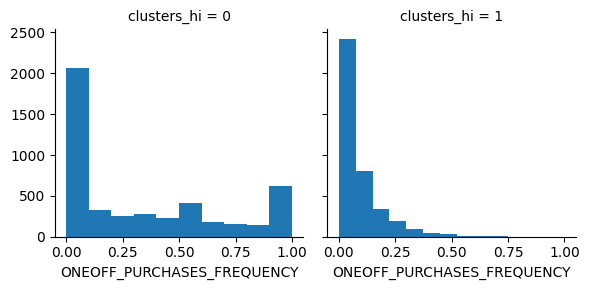

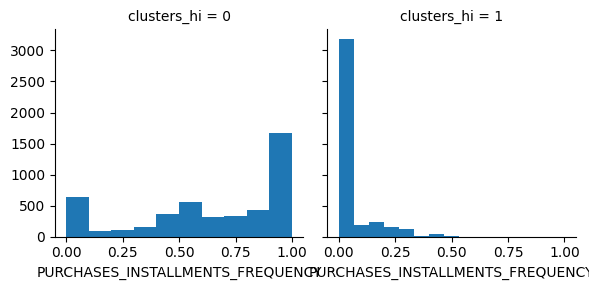

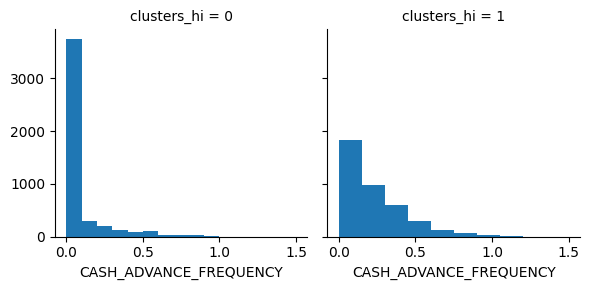

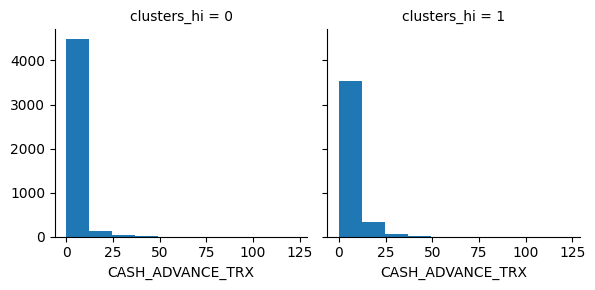

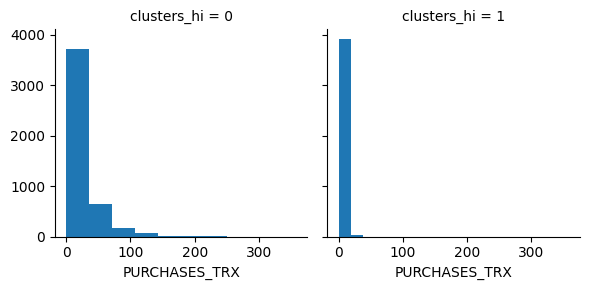

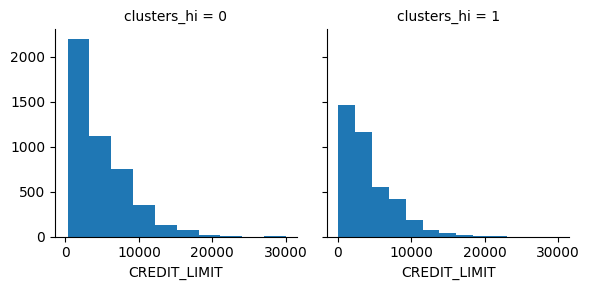

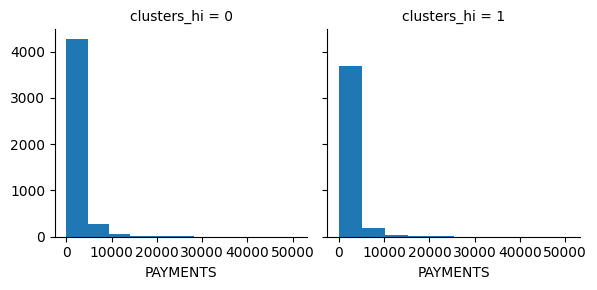

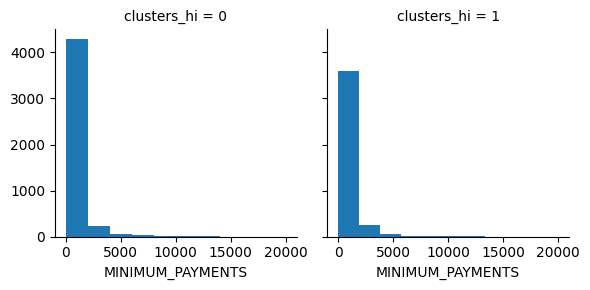

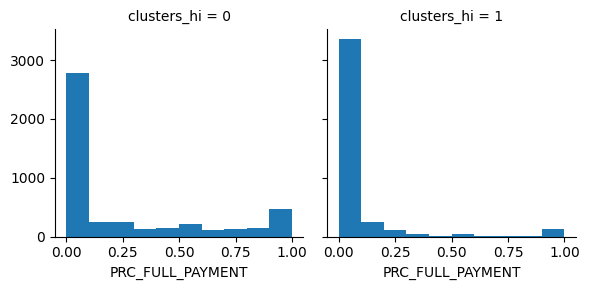

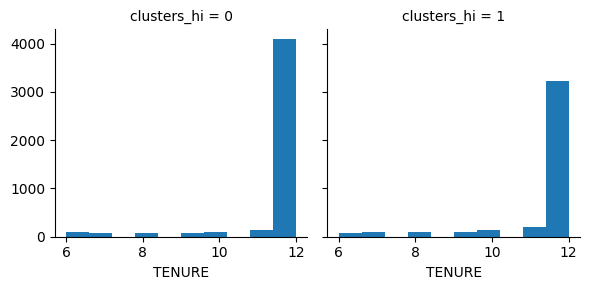

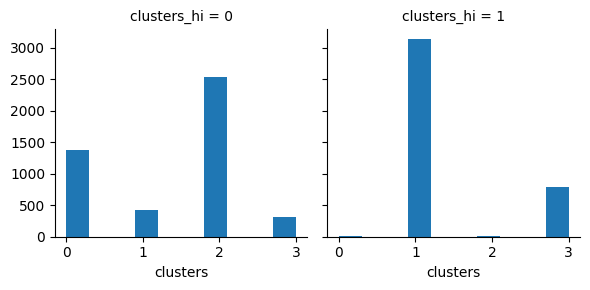

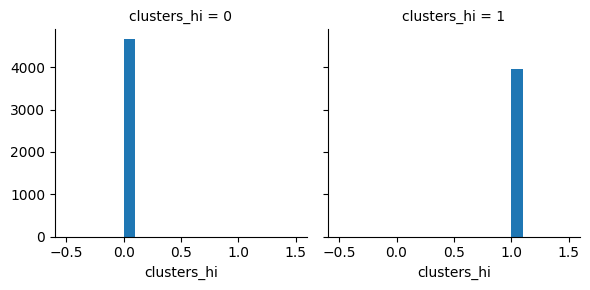

In [333]:
#According to the dendogram the optimal nr of clusters is 2 (largest gap)

#Training model
from sklearn.cluster import AgglomerativeClustering
hca = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y_hca = hca.fit_predict(df_cop)

#Adding the clusters to original df
#df["clusters_hi"] = y_hca

#Get statistics from each cluster
inter_clusters(df = df, col_with_clus= "clusters_hi")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape after PCA red :  (8608, 2)


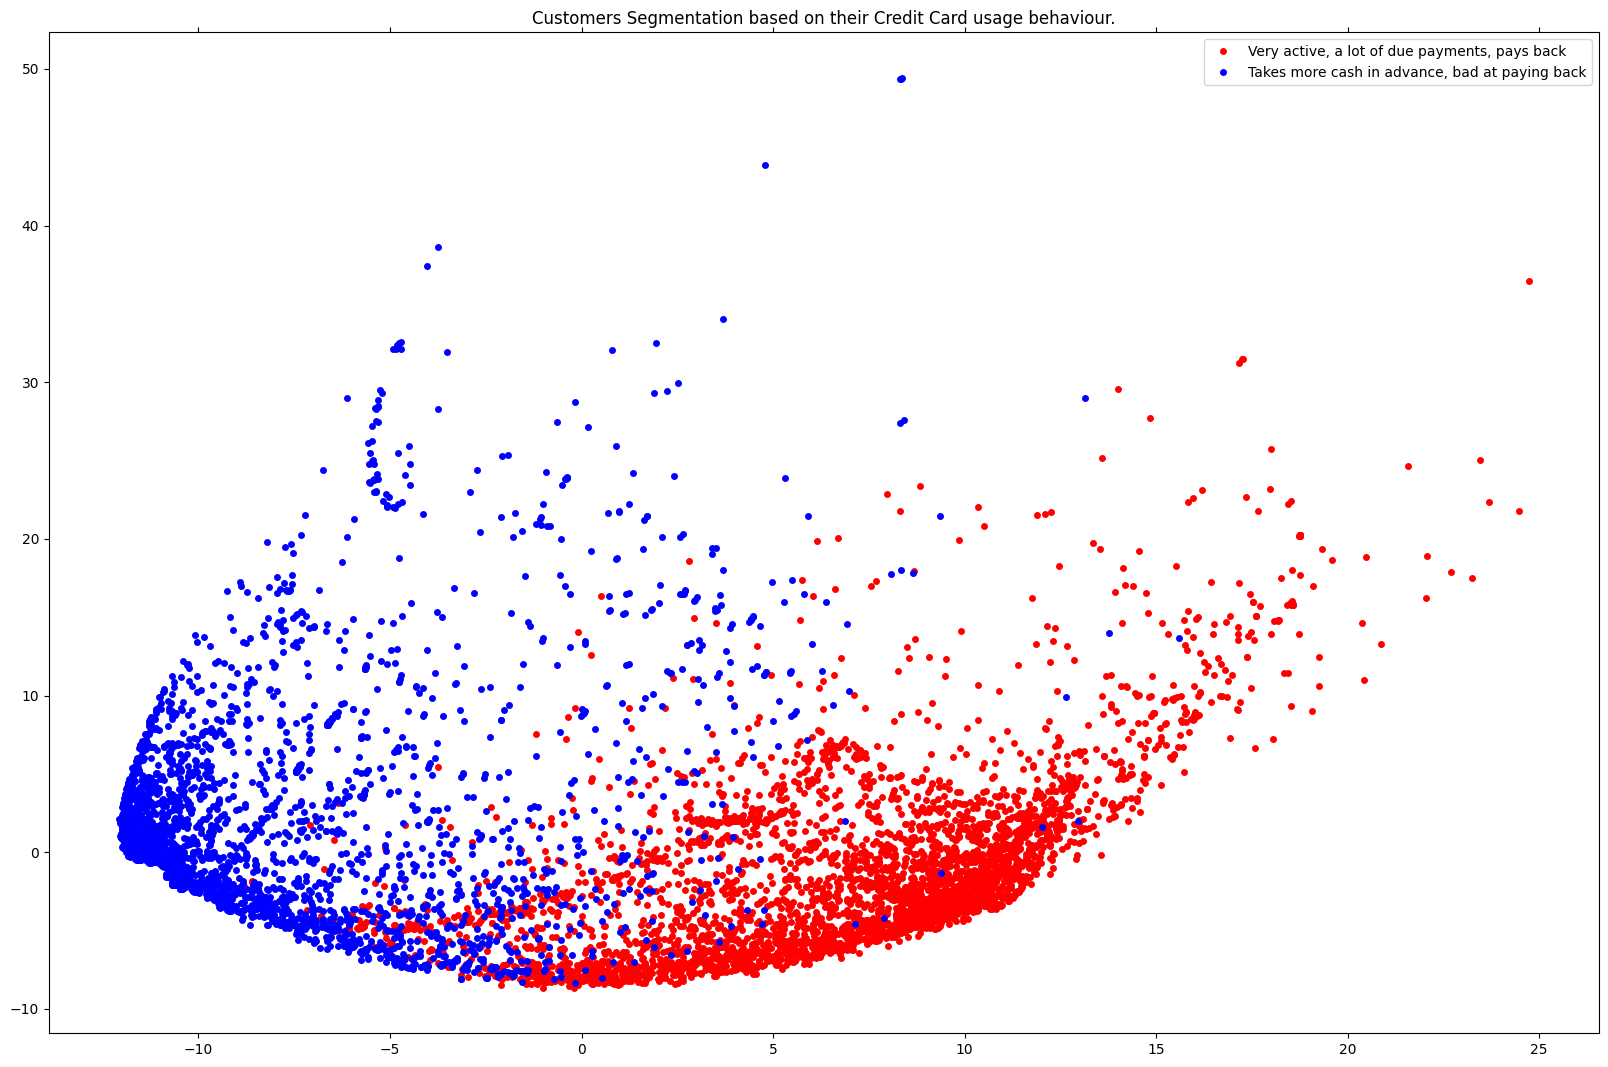

In [334]:
#Visualization using PCA

#Defin colors for groups
colors = {0: 'red',
          1: 'blue'}

#Define labels for groups
names = {0: 'Very active, a lot of due payments, pays back',
         1: 'Takes more cash in advance, bad at paying back'}

#Getting function
%load_ext autoreload
from functions import visual_clusters_pca
%autoreload 2
visual_clusters_pca(df_cop,y_hca, colors, names)